<a href="https://colab.research.google.com/github/VictorBenoiston/hidden_layers_neuros_comparassion/blob/main/1st_assignment_embeded_systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Trabalho de Sistemas Embarcados - Unidade 1
# Victor Benoiston Jales de Oliveira.

In [1]:
import tensorflow as tf
import numpy as np

print(tf.version.VERSION)

2.13.0


In [98]:
# Define alguns dados para treino (xs como entradas e ys como saídas)

xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

In [3]:
# O tipo "list" fornece um parâmetro "shape" com o formato da lista, ou seja, quais dimensões
print(xs, xs.shape)
print(ys, ys.shape)

[-1.  0.  1.  2.  3.  4.] (6,)
[-3. -1.  1.  3.  5.  7.] (6,)


# Definindo o Modelo (Arquitetura NN - Arquitetura 1)
* Para os fins desta sessão de testes, esta arquitetura será definida como "Arquitetura 1", sendo referida como "a1".

In [99]:
# Define uma rede neuraral (NN) com 1 neurônio

a1 = tf.keras.Sequential(
          [tf.keras.layers.Dense( units=1, input_shape=[1])]
    )

In [18]:
# Mostra um resumo de todas as camadas e parâmetros da NN
a1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Inicialização dos parâmetros padrão

* kernel_initializer ('ws') => 'glorot_uniform' (Xavier)
* bias_initializer ('bs') => 'zeros'

-> O objetivo da Xavier Initialization é inicializar os pesos de forma que a variação das ativações seja a mesma em todas as camadas. Essa variação constante ajuda a evitar que o gradiente exploda ou desapareça.

In [100]:
a1.get_weights() # lista de parâmetros

[array([[0.44894397]], dtype=float32), array([0.], dtype=float32)]

In [24]:
print("wi = ", a1.get_weights()[0][0][0])
print("b  = ", a1.get_weights()[1][0])

wi =  -1.1682422
b  =  0.0


# Compilando o Modelo

In [101]:
# Use stochastic gradient descent (SGD) para otimização e
# o erro quadrático médio como função de perda

a1.compile(optimizer='sgd', loss='mean_squared_error')

In [26]:
a1.save('my_first_model_no_training.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [102]:
print(a1.predict([10.0]))

1/1 [==============================] - 0s 74ms/step
[[4.48944]]


Inspecionando o Modelo com [Netron](https://netron.app)

In [14]:
#instalando Netron para executar dentro do colab
!pip install -q netron

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.9 MB/s eta 0:00:00


In [ ]:
#visualizar usando Netron
import netron
import portpicker
from google.colab import output

port = portpicker.pick_unused_port()

# Read the model file and start the netron browser.
with output.temporary():
  netron.start('my_first_model_no_training.h5', port, browse=False)

output.serve_kernel_port_as_iframe(port, height='800')

# Arquitetura 1, Modelo 1 (A1M1)

In [ ]:
#Copiando a arquitetura 1 para o modelo 2.
a1m1 = a1

# Treinando o modelo com 100 epocas - A1M1
history_a1m1 = a1m1.fit(xs, ys, epochs=100)

In [104]:
# Inspecionando o modelo
print("wi = ", a1m1.get_weights()[0][0][0])
print("b  = ", a1m1.get_weights()[1][0])

wi =  1.8447167
b  =  -0.51859474


In [105]:
# Salvando o Modelo treinado (Arquitetura 1, Modelo 1 - A1M1)
a1.save('a1m1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#visualizando o modelo treinado no netron
port = portpicker.pick_unused_port()

# Read the model file and start the netron browser.
with output.temporary():
  netron.start('a1m1.h5', port, browse=False)

output.serve_kernel_port_as_iframe(port, height='800')

In [107]:
# Testando o modelo a1m1

print(a1m1.predict([10.0]))

1/1 [==============================] - 0s 61ms/step
[[17.928572]]


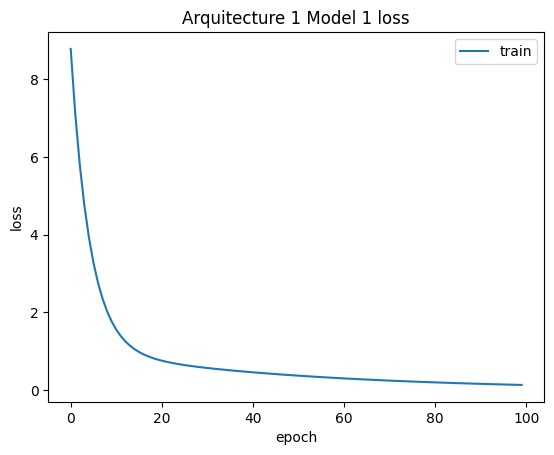

In [108]:
import matplotlib.pyplot as plt
plt.plot(history_a1m1.history['loss'])
plt.title('Arquitecture 1 Model 1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

# Arquitetura 1, Modelo 2 (A1M2)

In [ ]:
#Copiando a arquitetura 1 para o modelo 2.
a1m2 = a1

# Treinando o modelo com 200 epocas - A1M1
history_a1m2 = a1m2.fit(xs, ys, epochs=200)

In [110]:
# Inspecionando o modelo
print("wi = ", a1m2.get_weights()[0][0][0])
print("b  = ", a1m2.get_weights()[1][0])

wi =  1.9805129
b  =  -0.9395835


In [111]:
# Salvando o Modelo treinado (Arquitetura 1, Modelo 2 - A1M2)
a1.save('a1m2.h5')

In [112]:
# Testando o modelo a1m2

print(a1m2.predict([10.0]))

1/1 [==============================] - 0s 53ms/step
[[18.865545]]


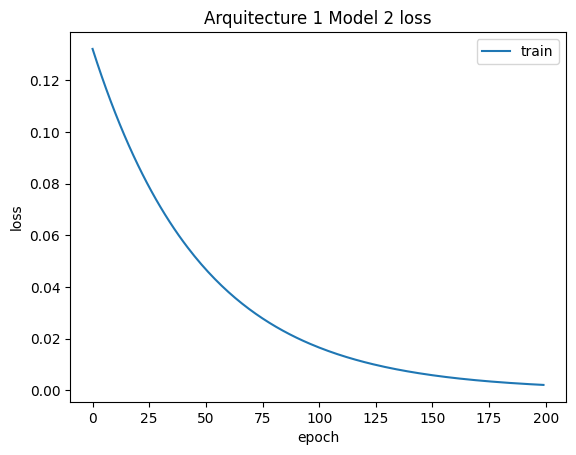

In [113]:
import matplotlib.pyplot as plt
plt.plot(history_a1m2.history['loss'])
plt.title('Arquitecture 1 Model 2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

# Arquitetura 1, Modelo 3 (A1M3)

In [ ]:
#Copiando a arquitetura 1 para o modelo 3.
a1m3 = a1

# Treinando o modelo com 300 epocas - A1M1
history_a1m3 = a1m1.fit(xs, ys, epochs=300)

In [115]:
# Inspecionando o modelo
print("wi = ", a1m3.get_weights()[0][0][0])
print("b  = ", a1m3.get_weights()[1][0])

wi =  1.9991337
b  =  -0.99731386


In [116]:
# Salvando o Modelo treinado (Arquitetura 1, Modelo 3 - A1M3)
a1.save('a1m3.h5')

In [117]:
# Testando o modelo a1m3

print(a1m3.predict([10.0]))

1/1 [==============================] - 0s 74ms/step
[[18.994022]]


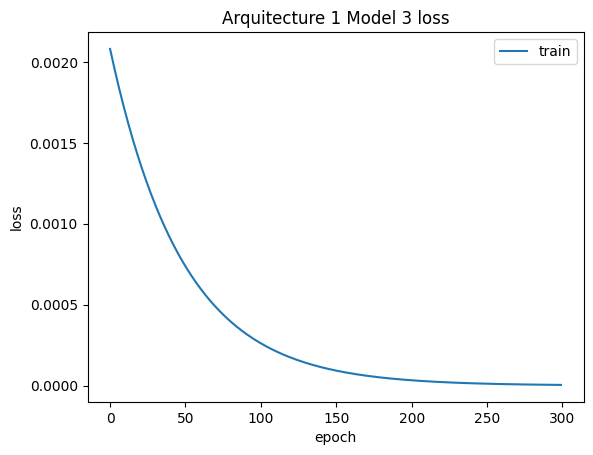

In [118]:
import matplotlib.pyplot as plt
plt.plot(history_a1m3.history['loss'])
plt.title('Arquitecture 1 Model 3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

# Arquitetura 1, Modelo 4 (A1M4)

In [ ]:
#Copiando a arquitetura 1 para o modelo 4.
a1m4 = a1

# Treinando o modelo com 400 epocas - A1M4
history_a1m4 = a1m4.fit(xs, ys, epochs=400)

In [120]:
# Inspecionando o modelo
print("wi = ", a1m4.get_weights()[0][0][0])
print("b  = ", a1m4.get_weights()[1][0])

wi =  1.9999859
b  =  -0.9999573


In [121]:
# Salvando o Modelo treinado (Arquitetura 1, Modelo 4 - A1M4)
a1.save('a1m4.h5')

In [122]:
# Testando o modelo a1m4

print(a1m4.predict([10.0]))

1/1 [==============================] - 0s 53ms/step
[[18.9999]]


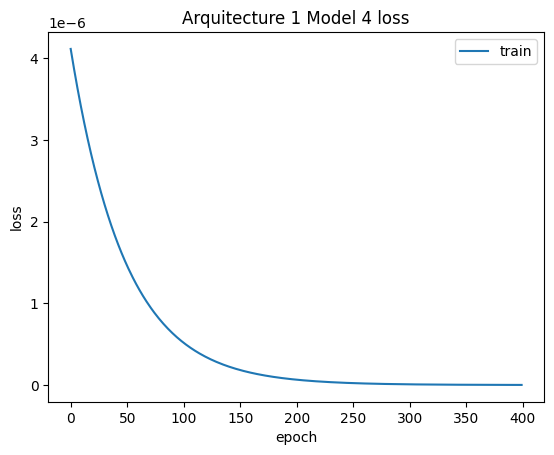

In [123]:
import matplotlib.pyplot as plt
plt.plot(history_a1m4.history['loss'])
plt.title('Arquitecture 1 Model 4 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

# Arquitetura 1, Modelo 5 (A1M5)

In [ ]:
#Copiando a arquitetura 1 para o modelo 5.
a1m5 = a1

# Treinando o modelo com 500 epocas - A1M5
history_a1m5 = a1m5.fit(xs, ys, epochs=500)

In [85]:
# Inspecionando o modelo
print("wi = ", a1m5.get_weights()[0][0][0])
print("b  = ", a1m5.get_weights()[1][0])

wi =  1.9999982
b  =  -0.99999595


In [86]:
# Salvando o Modelo treinado (Arquitetura 1, Modelo 5 - A1M5)
a1.save('a1m5.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [125]:
# Testando o modelo a1m5

print(a1m5.predict([10.0]))

1/1 [==============================] - 0s 39ms/step
[[18.999987]]


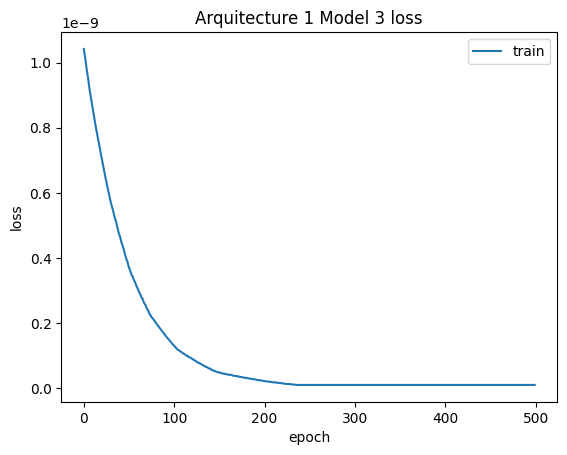

In [126]:
import matplotlib.pyplot as plt
plt.plot(history_a1m5.history['loss'])
plt.title('Arquitecture 1 Model 3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

# Definindo o Modelo (Arquitetura NN - Arquitetura 2)
* Para os fins desta sessão de testes, esta arquitetura será definida como "Arquitetura 2", sendo referida como "a2".

In [296]:
# Define uma rede neuraral (NN) com 2 neurônios
# Para maior informações sobre funções TF: https://www.tensorflow.org/api_docs

a2 = tf.keras.Sequential(
          [tf.keras.layers.Dense( units=2, input_shape=[1]),
           tf.keras.layers.Dense(units=1)]
    )

# Compilando o modelo

In [297]:
# Use stochastic gradient descent (SGD) para otimização e
# o erro quadrático médio como função de perda

a2.compile(optimizer='sgd', loss='mean_squared_error')

# Arquitetura 2, Modelo 1 (A2M1)

In [ ]:
#Copiando a arquitetura 2 para o modelo 1.
a2m1 = a2

# Treinando o modelo com 100 epocas - A2M1
history_a2m1 = a2m1.fit(xs, ys, epochs=100)

In [150]:
# Inspecionando o modelo
print("wi = ", a2m1.get_weights()[0][0][0])
print("b  = ", a2m1.get_weights()[1][0])

wi =  -1.3443642
b  =  0.32434458


In [151]:
# Salvando o Modelo treinado (Arquitetura 2, Modelo 1 - A2M1)
a2.save('a2m1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [152]:
# Testando o modelo a2m1

print(a2m1.predict([10.0]))

1/1 [==============================] - 0s 71ms/step
[[18.989567]]


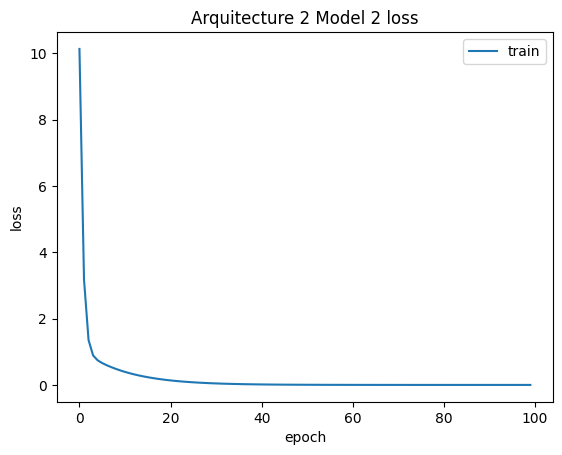

In [160]:
import matplotlib.pyplot as plt
plt.plot(history_a2m1.history['loss'])
plt.title('Arquitecture 2 Model 2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

# Arquitetura 2, Modelo 2 (A2M2)

In [ ]:
#Copiando a arquitetura 2 para o modelo 2.
a2m2 = a2

# Treinando o modelo com 200 epocas - A2M2
history_a2m2 = a2m2.fit(xs, ys, epochs=200)

In [240]:
# Inspecionando o modelo
print("wi = ", a2m2.get_weights()[0][0][0])
print("b  = ", a2m2.get_weights()[1][0])

wi =  0.61327565
b  =  -0.28684488


In [241]:
# Salvando o Modelo treinado (Arquitetura 2, Modelo 2 - A2M2)
a2.save('a2m2.h5')

In [242]:
# Testando o modelo a2m2

print(a2m2.predict([10.0]))

1/1 [==============================] - 0s 75ms/step
[[18.99819]]


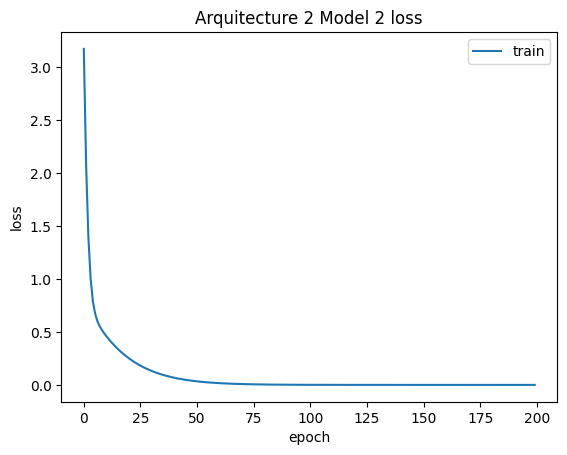

In [243]:
import matplotlib.pyplot as plt
plt.plot(history_a2m2.history['loss'])
plt.title('Arquitecture 2 Model 2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

# Arquitetura 2, Modelo 3 (A2M3)

In [ ]:
#Copiando a arquitetura 2 para o modelo 3.
a2m3 = a2

# Treinando o modelo com 300 epocas - A2M3
history_a2m3 = a2m3.fit(xs, ys, epochs=300)

In [299]:
# Inspecionando o modelo
print("wi = ", a2m3.get_weights()[0][0][0])
print("b  = ", a2m3.get_weights()[1][0])

wi =  1.1223483
b  =  -0.25063494


In [273]:
# Salvando o Modelo treinado (Arquitetura 2, Modelo 3 - A2M3)
a2.save('a2m3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [274]:
# Testando o modelo a2m3

print(a2m3.predict([10.0]))

1/1 [==============================] - 0s 72ms/step
[[18.999416]]


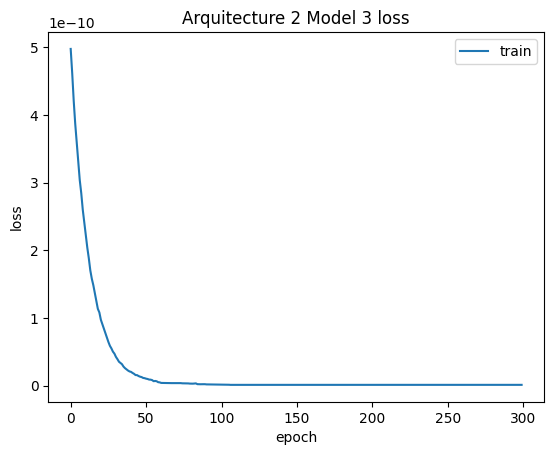

In [197]:
import matplotlib.pyplot as plt
plt.plot(history_a2m3.history['loss'])
plt.title('Arquitecture 2 Model 3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

# Arquitetura 2, Modelo 4 (A2M4)

In [ ]:
#Copiando a arquitetura 2 para o modelo 4.
a2m4 = a2

# Treinando o modelo com 400 epocas - A2M4
history_a2m4 = a2m4.fit(xs, ys, epochs=400)

In [278]:
# Inspecionando o modelo
print("wi = ", a2m4.get_weights()[0][0][0])
print("b  = ", a2m4.get_weights()[1][0])

wi =  -1.3248581
b  =  0.38315466


In [279]:
# Salvando o Modelo treinado (Arquitetura 2, Modelo 4 - A2M4)
a2.save('a2m4.h5')

In [280]:
# Testando o modelo a2m4

print(a2m4.predict([10.0]))

1/1 [==============================] - 0s 76ms/step
[[18.999996]]


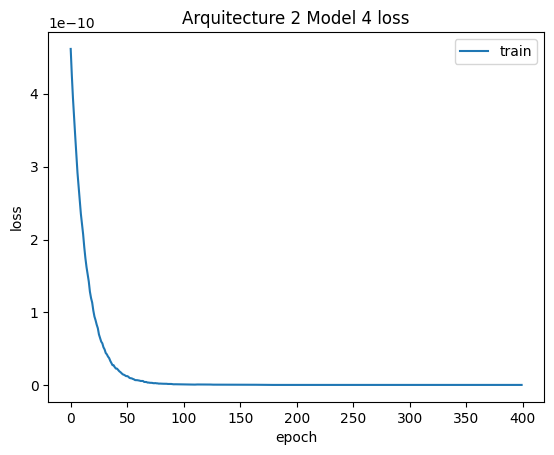

In [183]:
import matplotlib.pyplot as plt
plt.plot(history_a2m4.history['loss'])
plt.title('Arquitecture 2 Model 4 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

# Arquitetura 2, Modelo 5 (A2M5)

In [ ]:
#Copiando a arquitetura 2 para o modelo 5.
a2m5 = a2

# Treinando o modelo com 500 epocas - A2M5
history_a2m5 = a2m5.fit(xs, ys, epochs=500)

In [284]:
# Inspecionando o modelo
print("wi = ", a2m5.get_weights()[0][0][0])
print("b  = ", a2m5.get_weights()[1][0])

wi =  -1.3708448
b  =  0.5418871


In [285]:
# Salvando o Modelo treinado (Arquitetura 2, Modelo 5 - A2M5)
a2.save('a2m5.h5')

In [286]:
# Testando o modelo a2m5

print(a2m5.predict([10.0]))

1/1 [==============================] - 0s 70ms/step
[[18.999994]]


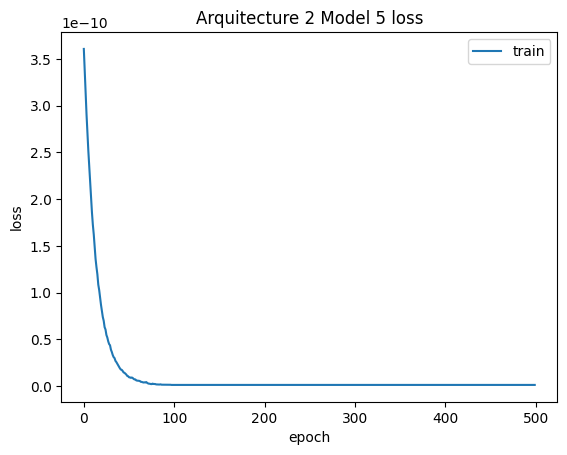

In [212]:
import matplotlib.pyplot as plt
plt.plot(history_a2m5.history['loss'])
plt.title('Arquitecture 2 Model 5 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

# Comparando as duas arquiteturas graficamente

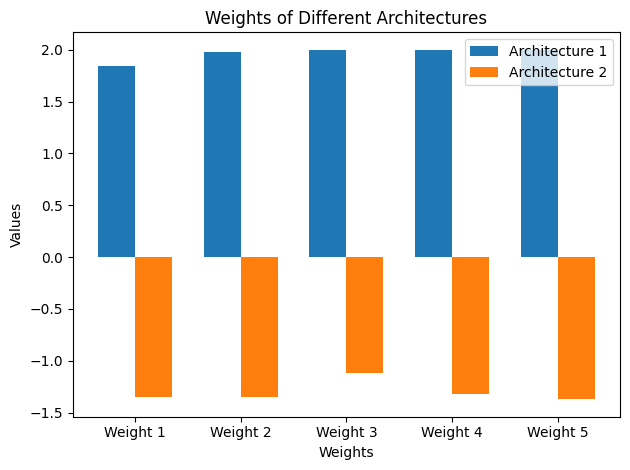

In [309]:
architectures = ['Architecture 1', 'Architecture 2']
weight_labels = ['Weight 1', 'Weight 2', 'Weight 3', 'Weight 4', 'Weight 5']
wia1 = [1.8447167, 1.9805129, 1.9991337, 1.9999859, 1.9999982]
ba1 = [-0.51859474, -0.9395835, -0.99731386, -0.9999573, -0.99999595]
wia2 = [-1.3443642, -1.3446904, -1.11633, -1.3248581, -1.3708448]
ba2 = [0.32434458, 0.3258666, 0.36915517, 0.38315466, 0.5418871]

x = np.arange(len(weight_labels))
bar_width = 0.35
plt.bar(x - bar_width/2, wia1, bar_width, label='Architecture 1', align='center')
plt.bar(x + bar_width/2, wia2, bar_width, label='Architecture 2', align='center')
plt.xlabel('Weights')
plt.ylabel('Values')
plt.title('Weights of Different Architectures')
plt.xticks(x, weight_labels)
plt.legend()

plt.tight_layout()
plt.show()


# Conclusão da primeira arquitetura:
-> 1 Neurônio na hidden layer.

A partir de 250 épocas, o treinamento se torna desnecessário. O Erro cria uma tendência à zero (limite), e varia em ordens 1*10ˆ-8. Assim como a precisão, após adotar um parâmetro de previsão para todos os modelos de 10, obtivemos os seguintes resultados:


* A1M1:
  * Pesos:
    * wi =  1.8447167
    * b  =  -0.51859474
  * **Predição para o valor 10 = 17.928572**
* A1M2:
  * Pesos:
    * wi =  1.9805129
    * b  =  -0.9395835
  * **Predição para o valor 10 = 18.865545**
* A1M3:
  * Pesos:
    * wi =  1.9991337
    * b  =  -0.99731386
  * **Predição para o valor 10 = 18.994022**
* A1M4:
  * Pesos:
    * wi =  1.9999859
    * b  =  -0.9999573
  * **Predição para o valor 10 = 18.999987**
* A1M5:
  * Pesos:
    * wi =  1.9999982
    * b  =  -0.99999595
  * **Predição para o valor 10 = 18.999987**

Logo, podemos inferor que à partir de 400 épocas, a variação é tão pequena, que ultrapassa a 7a casa decimal (que é mostrada por padrão no collab). Além disso, é possível observar que à partir do modelo 4, os pesos variam em uma ordem de casa decimal 5.

# Conclusão da segunda arquitetura
-> 2 Neurônios na hidden layer.

Em contrapartida, em uma arquitetura com dois neurônios, a estabilização do loss se dá por volta das 25 épocas. Mantendo o parâmetro de previsão 10, obtivemos:

* A2M1:
  * Pesos:
    * wi =  -1.3443642
    * b  =  0.32434458
  * **Predição para o valor 10 = 18.989567**
* A2M2:
  * Pesos:
    * wi =  -1.3446904
    * b  =  0.3258666
  * **Predição para o valor 10 = 18.999998**
* A2M3:
  * Pesos:
    * wi =  -1.11633
    * b  =  0.36915517
  * **Predição para o valor 10 = 18.999416**
* A2M4:
  * Pesos:
    * wi =  -1.3248581
    * b  =  0.38315466
  * **Predição para o valor 10 = 18.999996**
* A2M5:
  * Pesos:
    * wi =  -1.3708448
    * b  =  0.5418871
  * **Predição para o valor 10 = 18.999994**

  Podemos observar que os pesos não seguiram um padrão, como na primeira arquitetura, um possível causador seja o Learning rate.

  # Conclusão final
  